In [25]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Points

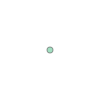

In [4]:
point1 = Point(2.2, 4.2)
point1

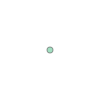

In [6]:
point2 = Point(7.2, -25.1)
point2

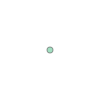

In [7]:
point3 = Point(9.26, -2.456)
point3

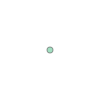

In [9]:
point3d = Point(24, -10, 1.5)
point3d

In [10]:
type(point3d)

shapely.geometry.point.Point

In [13]:
print(point1)
print(point3d)

POINT (2.2 4.2)
POINT Z (24 -10 1.5)


In [14]:
point1.x

2.2

In [15]:
point2.xy

(array('d', [7.2]), array('d', [-25.1]))

In [16]:
point_coords = point1.coords
point_coords

In [17]:
print(point_coords)

In [18]:
point_coords.xy

(array('d', [2.2]), array('d', [4.2]))

In [24]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))
#Units depend on input

Distance between the points is 29.72 decimal degrees


# LineStrings

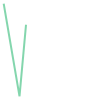

In [27]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])
line

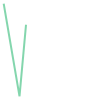

In [29]:
# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line2

In [30]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [31]:
type(line)

shapely.geometry.linestring.LineString

In [35]:
line_coords = line.xy
line_coords

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [37]:
centroid = line.centroid
print(centroid)

POINT (6.229961354035622 -11.89241115757239)


In [38]:
line.length

52.46106912939557

In [39]:
type(centroid)

shapely.geometry.point.Point

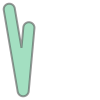

In [41]:
line.buffer(distance=2)

# Polygons

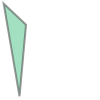

In [44]:
# Create a Polygon from the coordinates
poly = Polygon(shell=[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
poly

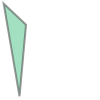

In [46]:
# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])
poly2

In [50]:
poly_type = type(poly)
poly_type

shapely.geometry.polygon.Polygon

In [51]:
poly.geom_type

'Polygon'

In [52]:
poly.geometryType

<bound method BaseGeometry.geometryType of <shapely.geometry.polygon.Polygon object at 0x00000247A530F710>>

In [53]:
line.geom_type

'LineString'

In [54]:
poly.area

86.78900000000002

In [55]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

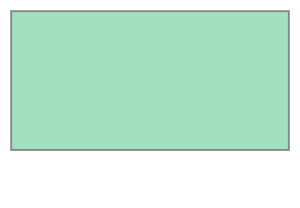

In [56]:
# World without a hole
world = Polygon(shell=world_exterior)
world


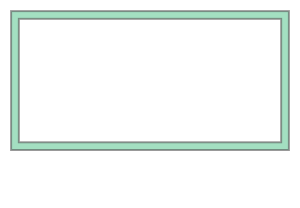

In [58]:
# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)
world_has_a_hole

In [59]:
print(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


In [60]:
world.area

64800.0

In [61]:
world_has_a_hole.area

10400.0

In [64]:
print(world.centroid)
print(world_has_a_hole.centroid)

POINT (-0 -0)
POINT (-0 -0)


In [65]:
# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds
world_bbox

(-180.0, -90.0, 180.0, 90.0)

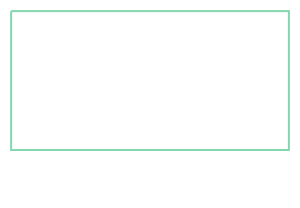

In [66]:
world.exterior

In [67]:
print(world.exterior)

LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)


# Geometry collections

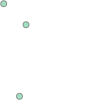

In [69]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
multi_point2

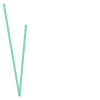

In [70]:
# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])

line2 = LineString([point2, point3])

multi_line = MultiLineString([line1, line2])
multi_line

In [71]:
# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90

max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

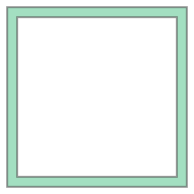

In [72]:
west_poly

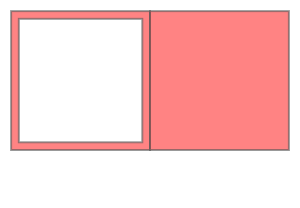

In [73]:
multi_poly

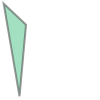

In [74]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull
convex

In [76]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)
lines_count

2

In [77]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area
multi_poly_area

39200.0

In [78]:
# We can also access different items inside our geometry collections. We can e.g. access a single polygon from
# our MultiPolygon -object by referring to the index
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area
west_area

6800.0

In [79]:
east_area = multi_poly[1].area
east_area

32400.0

In [81]:
'''We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as 
valid if the individual polygons does notintersect with each other. Here, 
because the polygons have a common 0-meridian, we should NOT have a valid 
polygon. This can be really useful information when trying to find topological 
errors from your data'''
valid = multi_poly.is_valid
valid

False